In [1]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from scipy.signal import find_peaks
import numpy as np


import matplotlib.pyplot as plt
import datetime
import pickle
import gzip

np.random.seed(datetime.datetime.now().microsecond)

PEAK_THRESHOLD = 390
DATA_PATH = "./data/exported/30sec/"

# Data Load

## Sitting

In [2]:
# Sitting data load
with gzip.open(DATA_PATH + "sitting_ecg.pkl", "rb") as f:
    sitting_ecg = pickle.load(f)

with gzip.open(DATA_PATH + "sitting_acc.pkl", "rb") as f:
    sitting_acc = pickle.load(f)
sitting_acc = sitting_acc - np.mean(sitting_acc)

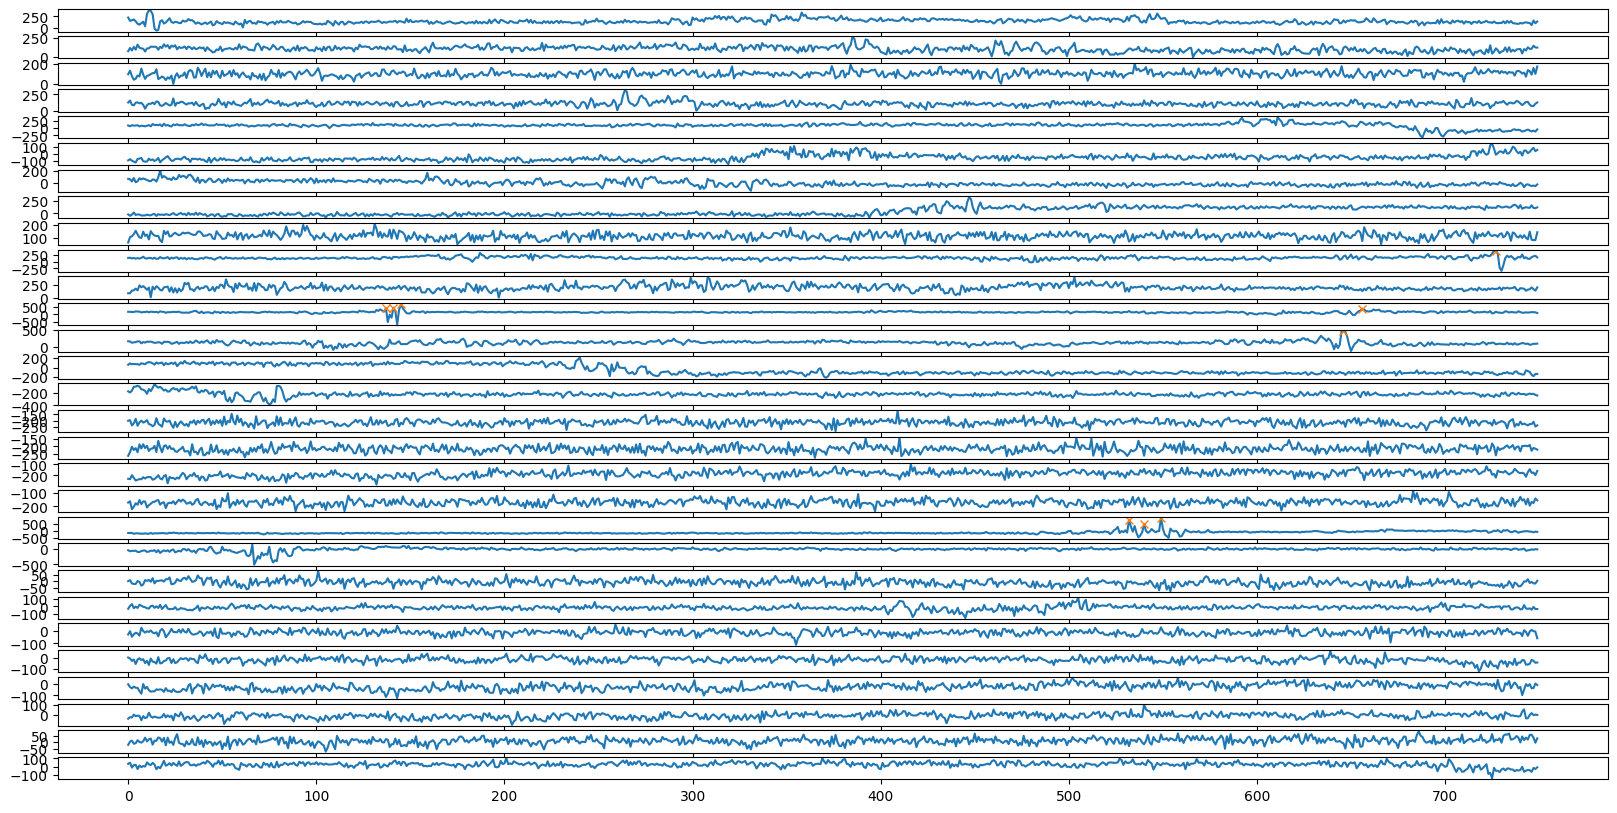

In [3]:
fig, ax = plt.subplots(len(sitting_acc), 1, figsize=(20, 10))
for idx in range(len(sitting_acc)):
    peaks, _ = find_peaks(sitting_acc[idx], height=PEAK_THRESHOLD)
    np.diff(peaks)

    ax[idx].plot(sitting_acc[idx])
    ax[idx].plot(peaks, sitting_acc[idx][peaks], "x")
plt.show()

In [4]:
peak_list = list()
for idx in range(len(sitting_acc)):
    peaks, _ = find_peaks(sitting_acc[idx], height=PEAK_THRESHOLD)
    if peaks == []:
        peak_list.append(np.array([0]))
    peak_list.append(len(peaks))

X_sitting = sitting_ecg
y_sitting = peak_list

/var/folders/gq/xnxpqv5x7jz19nnym4s4_l940000gn/T/ipykernel_7957/2995813941.py:4: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if peaks == []:
/var/folders/gq/xnxpqv5x7jz19nnym4s4_l940000gn/T/ipykernel_7957/2995813941.py:4: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if peaks == []:


## Walking

In [5]:
# Walking data load
with gzip.open(DATA_PATH + "walking_ecg.pkl", "rb") as f:
    walking_ecg = pickle.load(f)

with gzip.open(DATA_PATH + "walking_acc.pkl", "rb") as f:
    walking_acc = pickle.load(f)
walking_acc = walking_acc - np.mean(walking_acc)

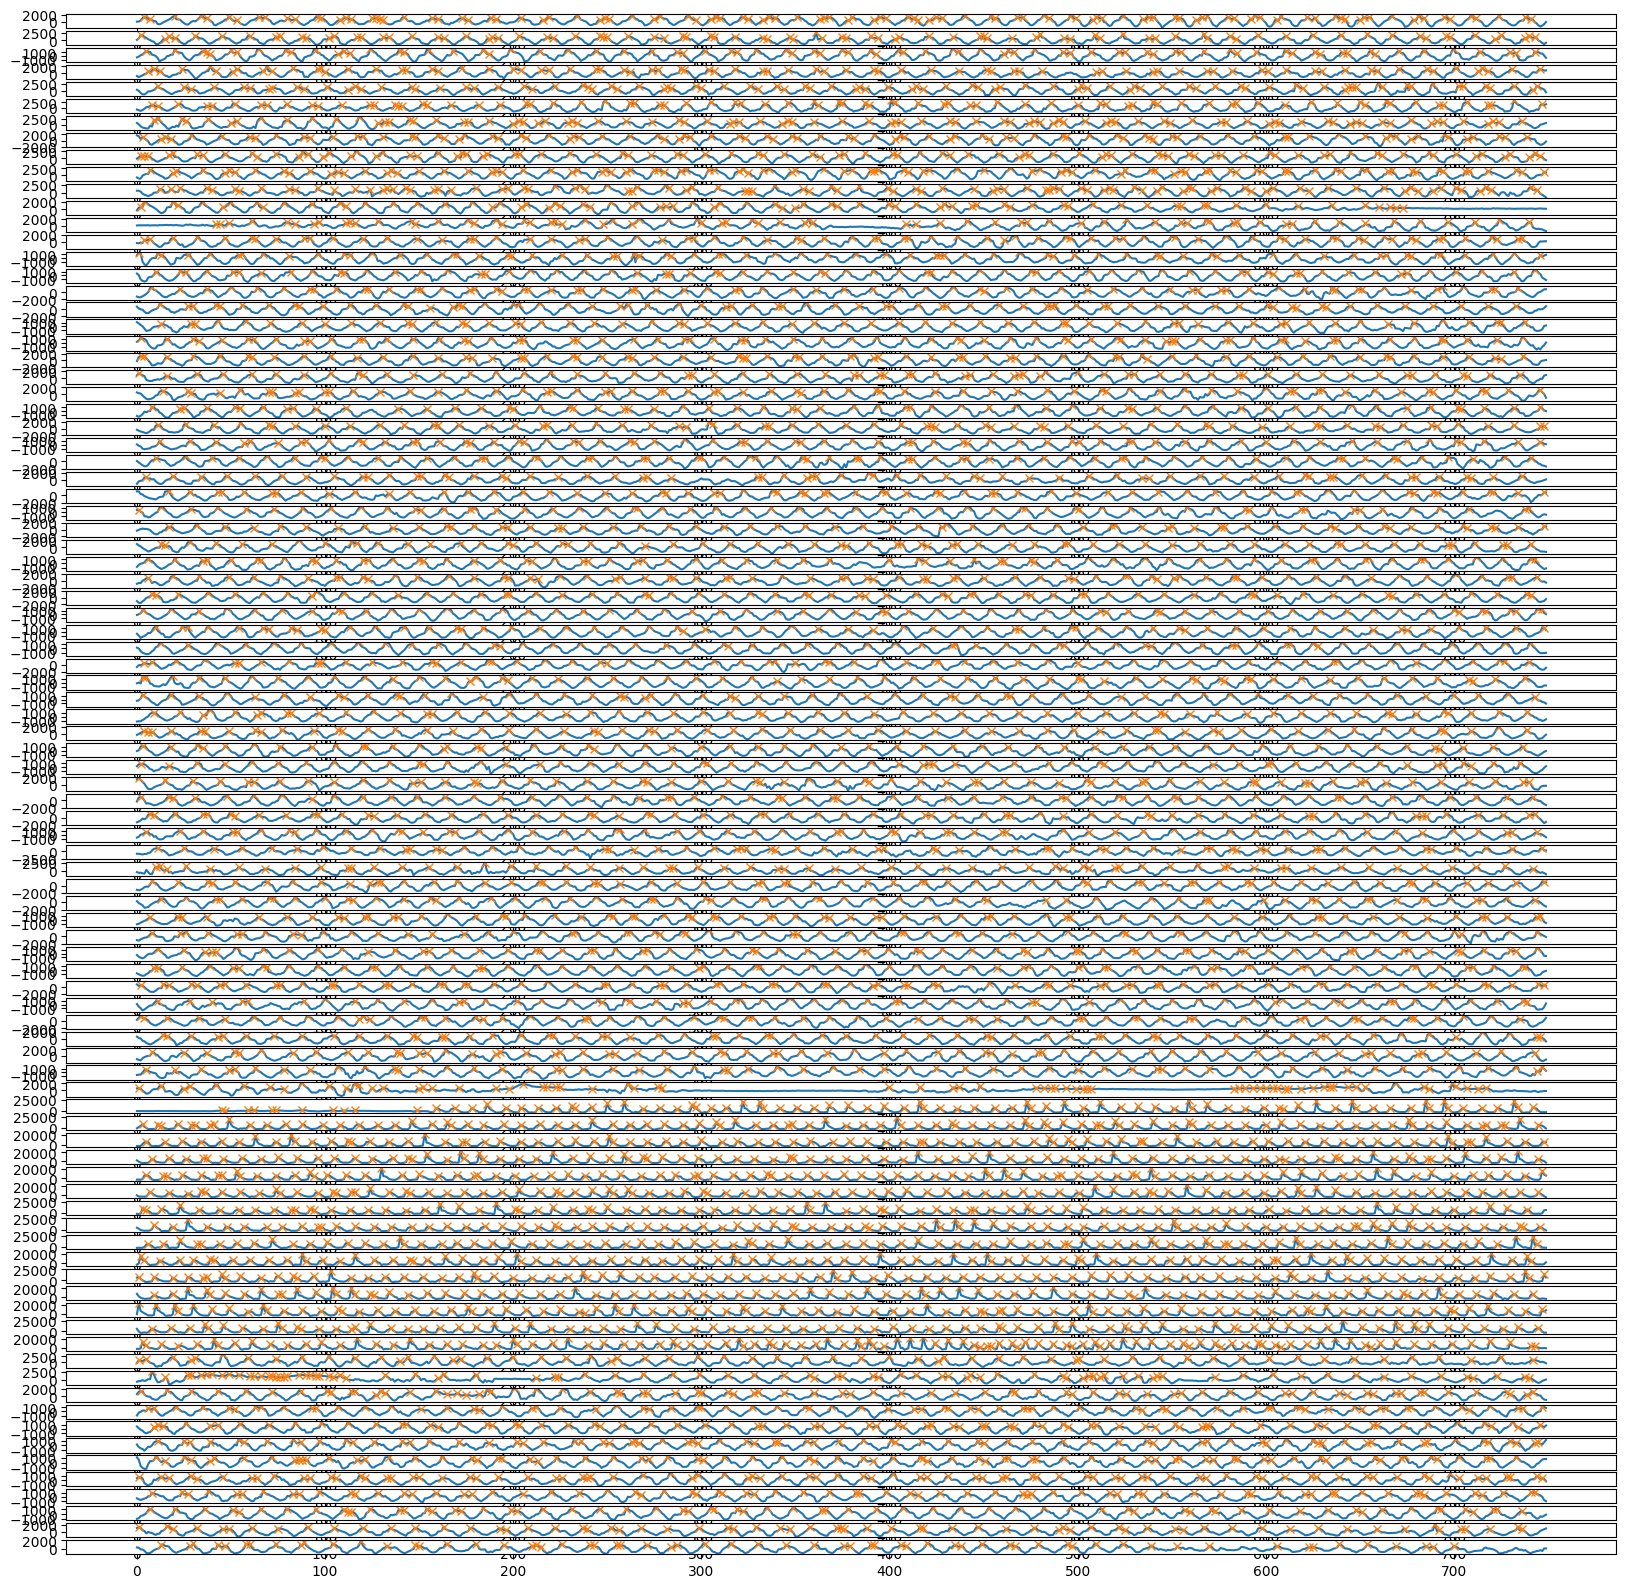

In [6]:
fig, ax = plt.subplots(len(walking_acc), 1, figsize=(20, 20))
for idx in range(len(walking_acc)):
    peaks, _ = find_peaks(walking_acc[idx], height=PEAK_THRESHOLD)
    np.diff(peaks)

    ax[idx].plot(walking_acc[idx])
    ax[idx].plot(peaks, walking_acc[idx][peaks], "x")
plt.show()

In [7]:
peak_list = list()
for idx in range(len(walking_acc)):
    peaks, _ = find_peaks(walking_acc[idx], height=PEAK_THRESHOLD)
    if peaks == []:
        peak_list.append(np.array([0]))
    peak_list.append(len(peaks))

X_walking = walking_ecg
y_walking = peak_list

/var/folders/gq/xnxpqv5x7jz19nnym4s4_l940000gn/T/ipykernel_7957/4260280322.py:4: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if peaks == []:


In [8]:
print(y_walking)

[109, 87, 79, 81, 90, 80, 91, 88, 91, 98, 98, 73, 70, 73, 70, 66, 68, 69, 60, 69, 69, 64, 66, 60, 66, 66, 66, 64, 65, 58, 62, 63, 65, 68, 64, 60, 61, 58, 61, 59, 58, 58, 60, 56, 58, 64, 59, 66, 60, 65, 61, 65, 62, 68, 65, 70, 67, 76, 62, 65, 64, 64, 58, 71, 85, 94, 87, 88, 89, 87, 85, 88, 87, 89, 87, 85, 91, 88, 107, 59, 85, 77, 76, 78, 77, 78, 84, 73, 68, 67, 63]


## Running

In [9]:
# Running data load
with gzip.open(DATA_PATH + "running_ecg.pkl", "rb") as f:
    running_ecg = pickle.load(f)

with gzip.open(DATA_PATH + "running_acc.pkl", "rb") as f:
    running_acc = pickle.load(f)
running_acc = running_acc - np.mean(running_acc)

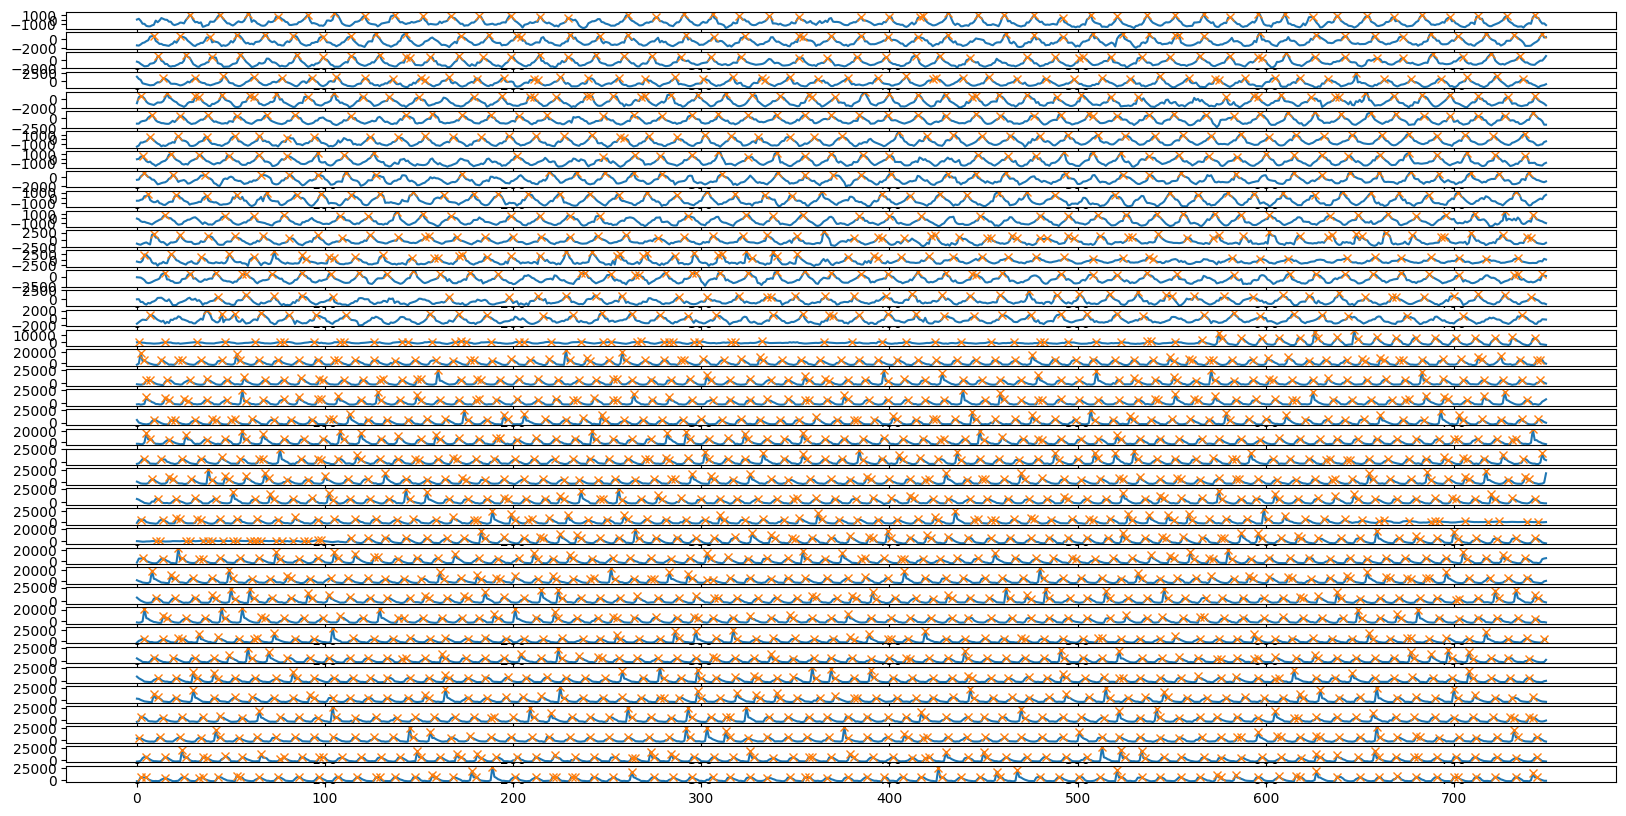

In [10]:
fig, ax = plt.subplots(len(running_acc), 1, figsize=(20, 10))
for idx in range(len(running_acc)):
    peaks, _ = find_peaks(running_acc[idx], height=PEAK_THRESHOLD)
    np.diff(peaks)

    ax[idx].plot(running_acc[idx])
    ax[idx].plot(peaks, running_acc[idx][peaks], "x")
plt.show()

In [11]:
peak_list = list()
for idx in range(len(running_acc)):
    peaks, _ = find_peaks(running_acc[idx], height=PEAK_THRESHOLD)
    if peaks == []:
        peak_list.append(np.array([0]))
    peak_list.append(len(peaks))

X_running = running_ecg
y_running = peak_list

/var/folders/gq/xnxpqv5x7jz19nnym4s4_l940000gn/T/ipykernel_7957/2482152495.py:4: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if peaks == []:


# X, y data Split

In [12]:
BATCH_SIZE = 1

In [13]:
X = np.concatenate((X_walking, X_running))
y = np.concatenate((y_walking, y_running))

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

print(f"""X shape: {X.shape}
y shape: {y.shape}""")

X shape: (130, 7500)
y shape: (130,)


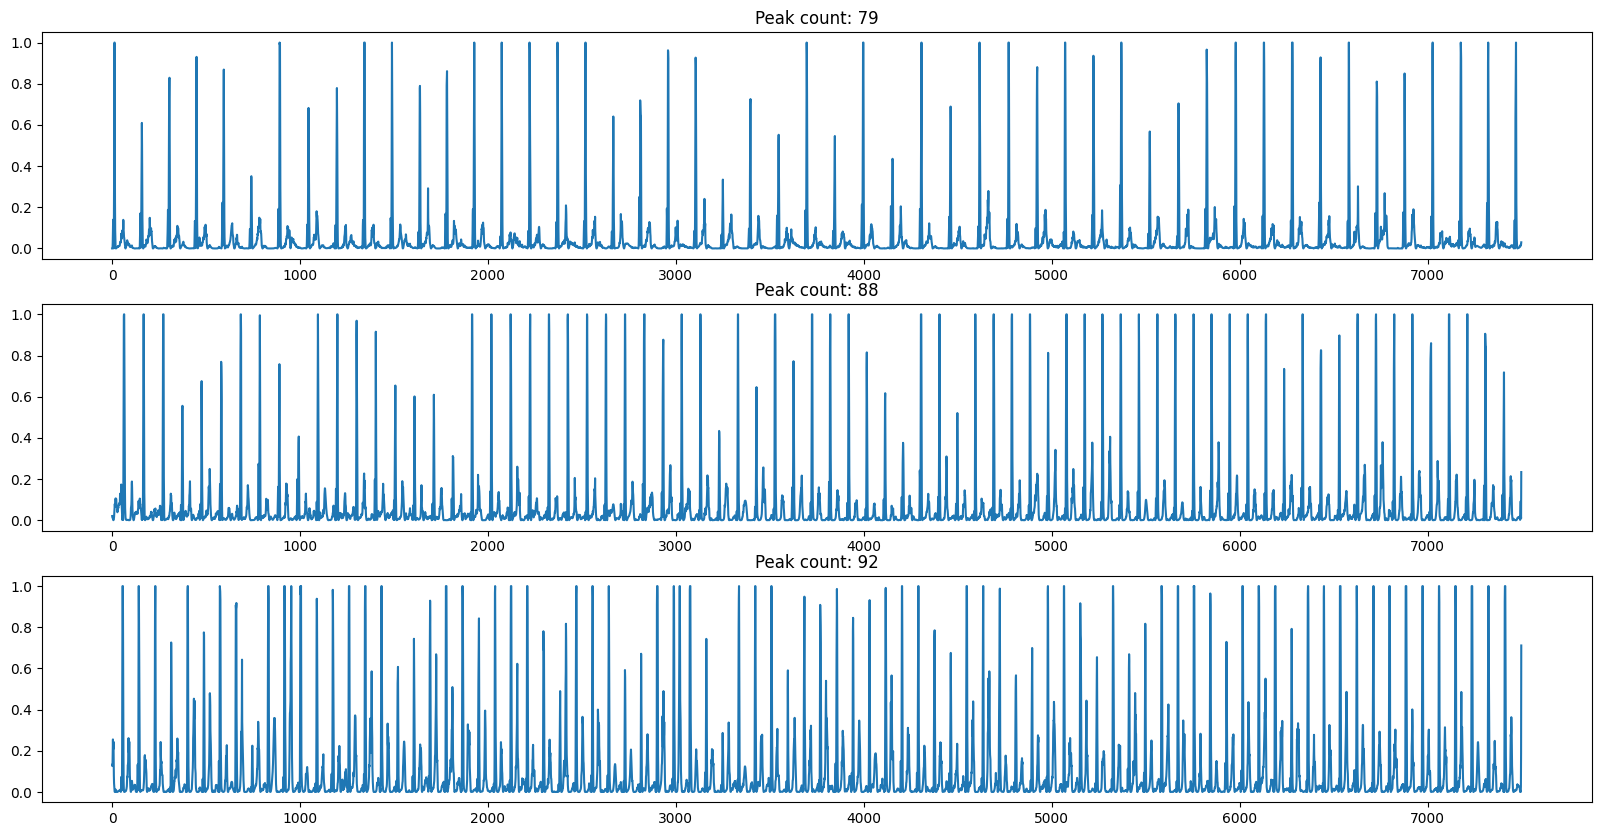

In [14]:
plotting_idx = np.random.randint(0, len(X), 3)

# Plotting the data
fig, ax = plt.subplots(3, 1, figsize=(20, 10))

for idx in range(3):
    ax[idx].plot(X[plotting_idx[idx]])
    ax[idx].set_title(f"Peak count: {y[plotting_idx[idx]]}")
plt.show()


In [15]:
with gzip.open('./data//exported/X.pkl', 'wb') as f:
    pickle.dump(X, f)

with gzip.open('./data//exported/y.pkl', 'wb') as f:
    pickle.dump(y, f)

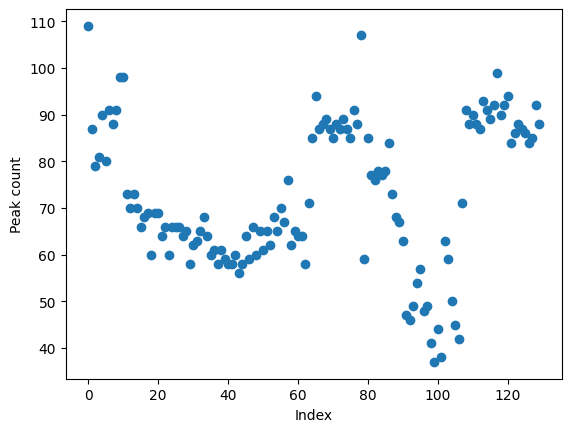

In [16]:
plt.scatter(np.arange(len(y)), y)
plt.xlabel("Index")
plt.ylabel("Peak count")
plt.show()

In [17]:
with gzip.open('./data//exported/X.pkl', 'rb') as f:
    X = pickle.load(f)

with gzip.open('./data//exported/y.pkl', 'rb') as f:
    y = pickle.load(f)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=datetime.datetime.now().microsecond)

print(f"""X_train shape: {X_train.shape}
y_train shape: {y_train.shape}
X_test shape: {X_test.shape}
y_test shape: {y_test.shape}""")

X_train shape: (104, 7500)
y_train shape: (104,)
X_test shape: (26, 7500)
y_test shape: (26,)


# Modeling

In [18]:
model = DecisionTreeRegressor(random_state=datetime.datetime.now().microsecond)
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=824137)

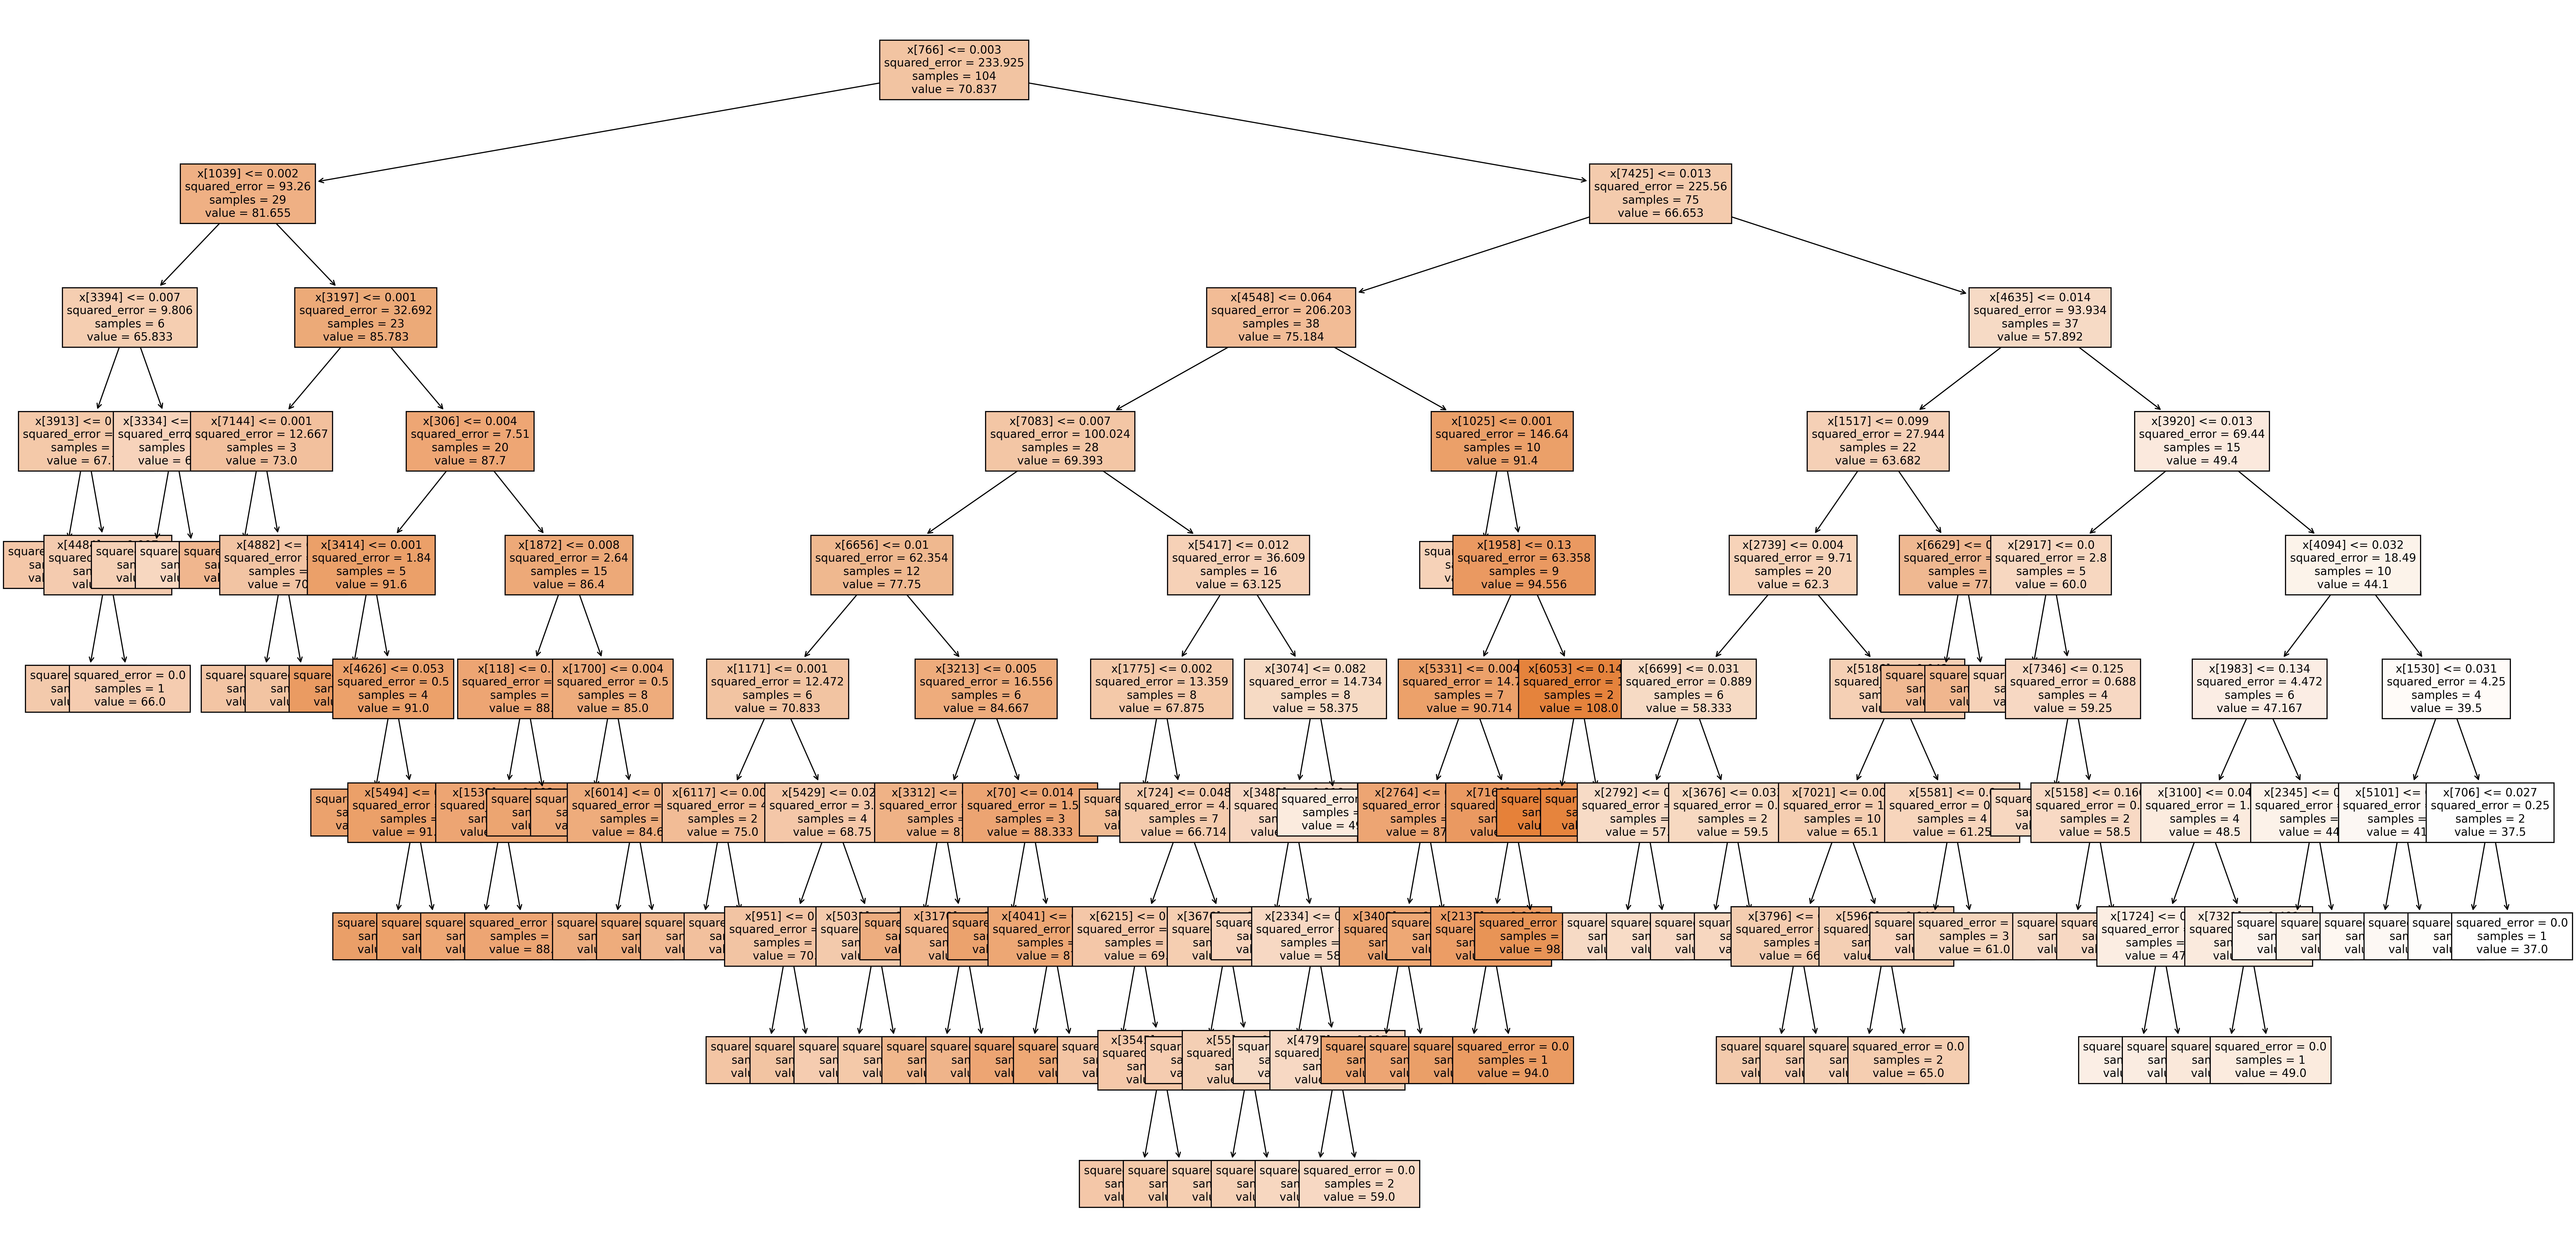

In [19]:
from sklearn.tree import plot_tree

fig, ax = plt.subplots(figsize=(40, 20), dpi=300)
plot_tree(model, ax=ax, filled=True, fontsize=10)
plt.show()

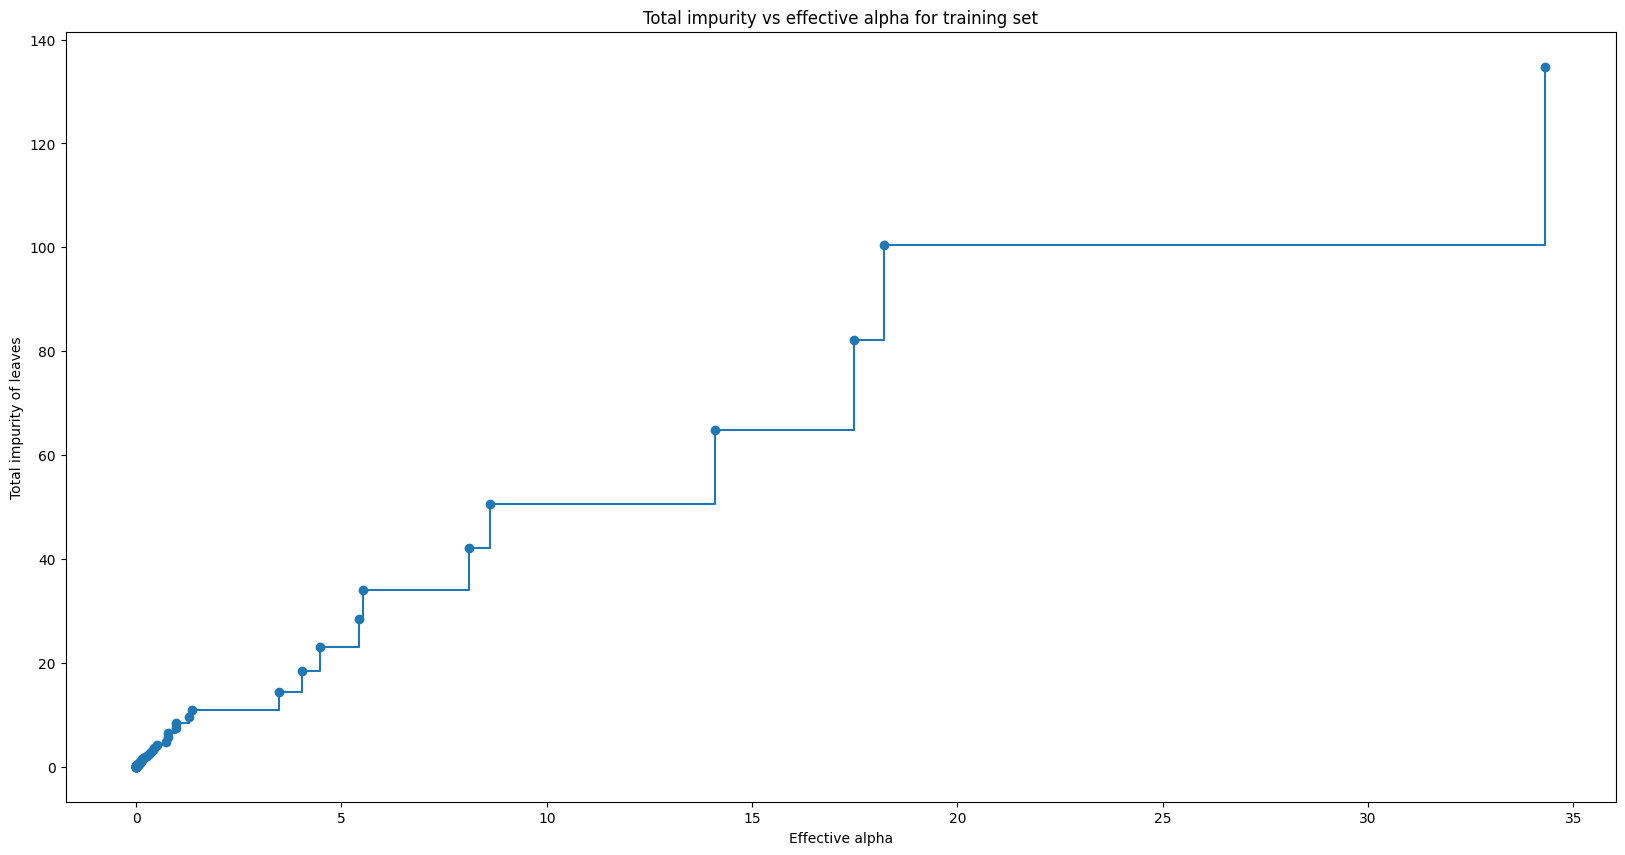

In [20]:
path = model.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("Effective alpha")
ax.set_ylabel("Total impurity of leaves")
ax.set_title("Total impurity vs effective alpha for training set")
plt.show()

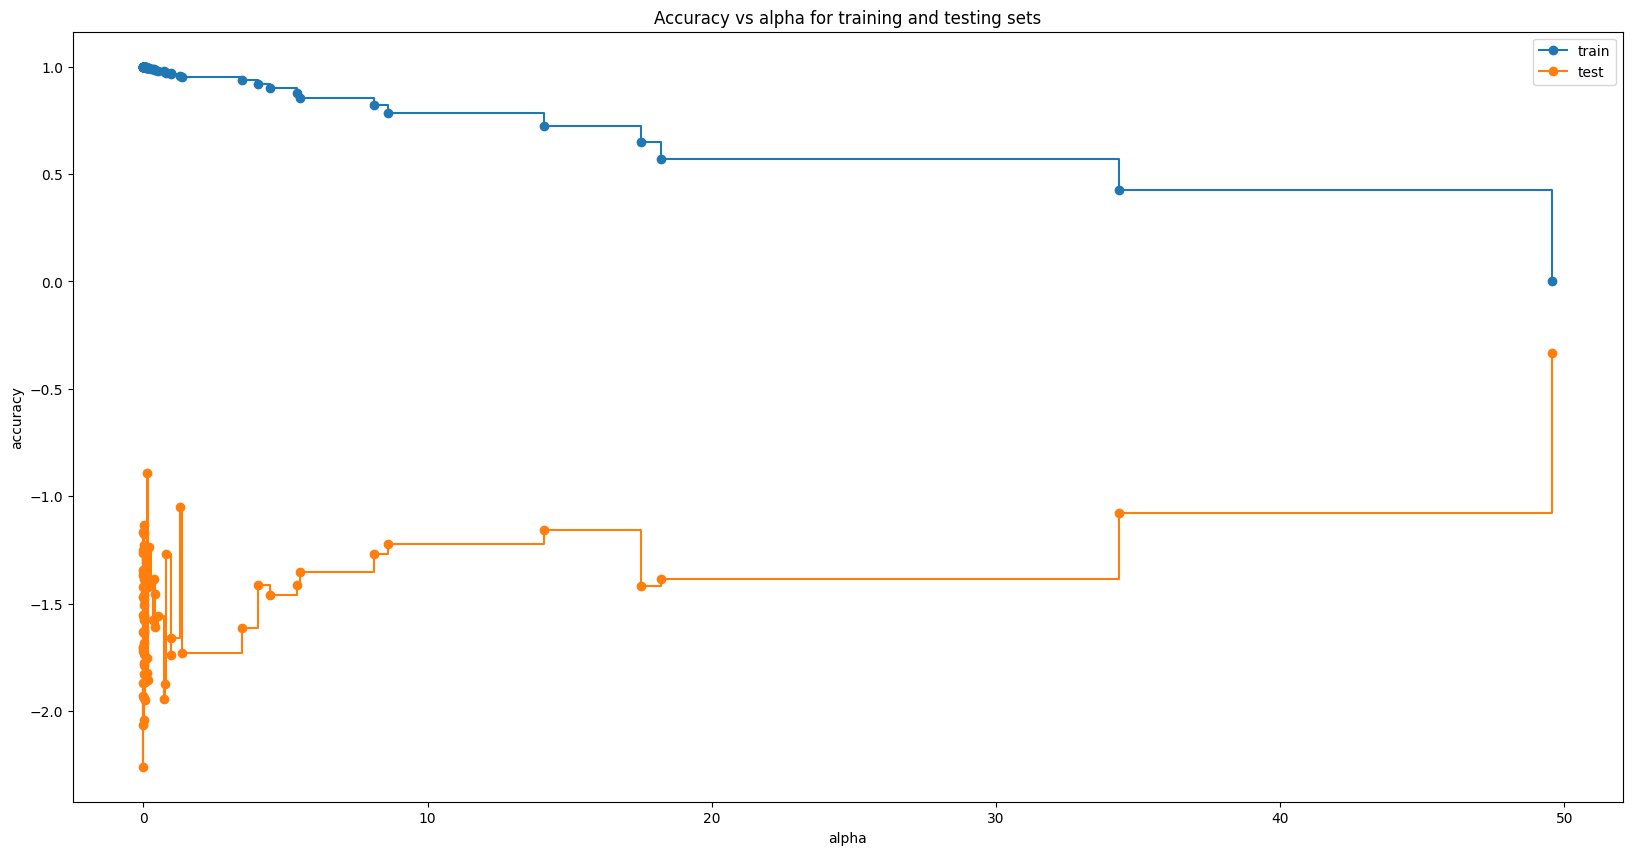

In [21]:
models = []
for ccp_alpha in ccp_alphas:
    model = DecisionTreeRegressor(random_state=datetime.datetime.now().microsecond, ccp_alpha=ccp_alpha)
    model.fit(X_train, y_train)
    models.append(model)

train_scores = [model.score(X_train, y_train) for model in models]
test_scores = [model.score(X_test, y_test) for model in models]

fig, ax = plt.subplots(figsize=(20, 10))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [29]:
model = DecisionTreeRegressor(random_state=datetime.datetime.now().microsecond, ccp_alpha=35)
model.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=35, random_state=787403)

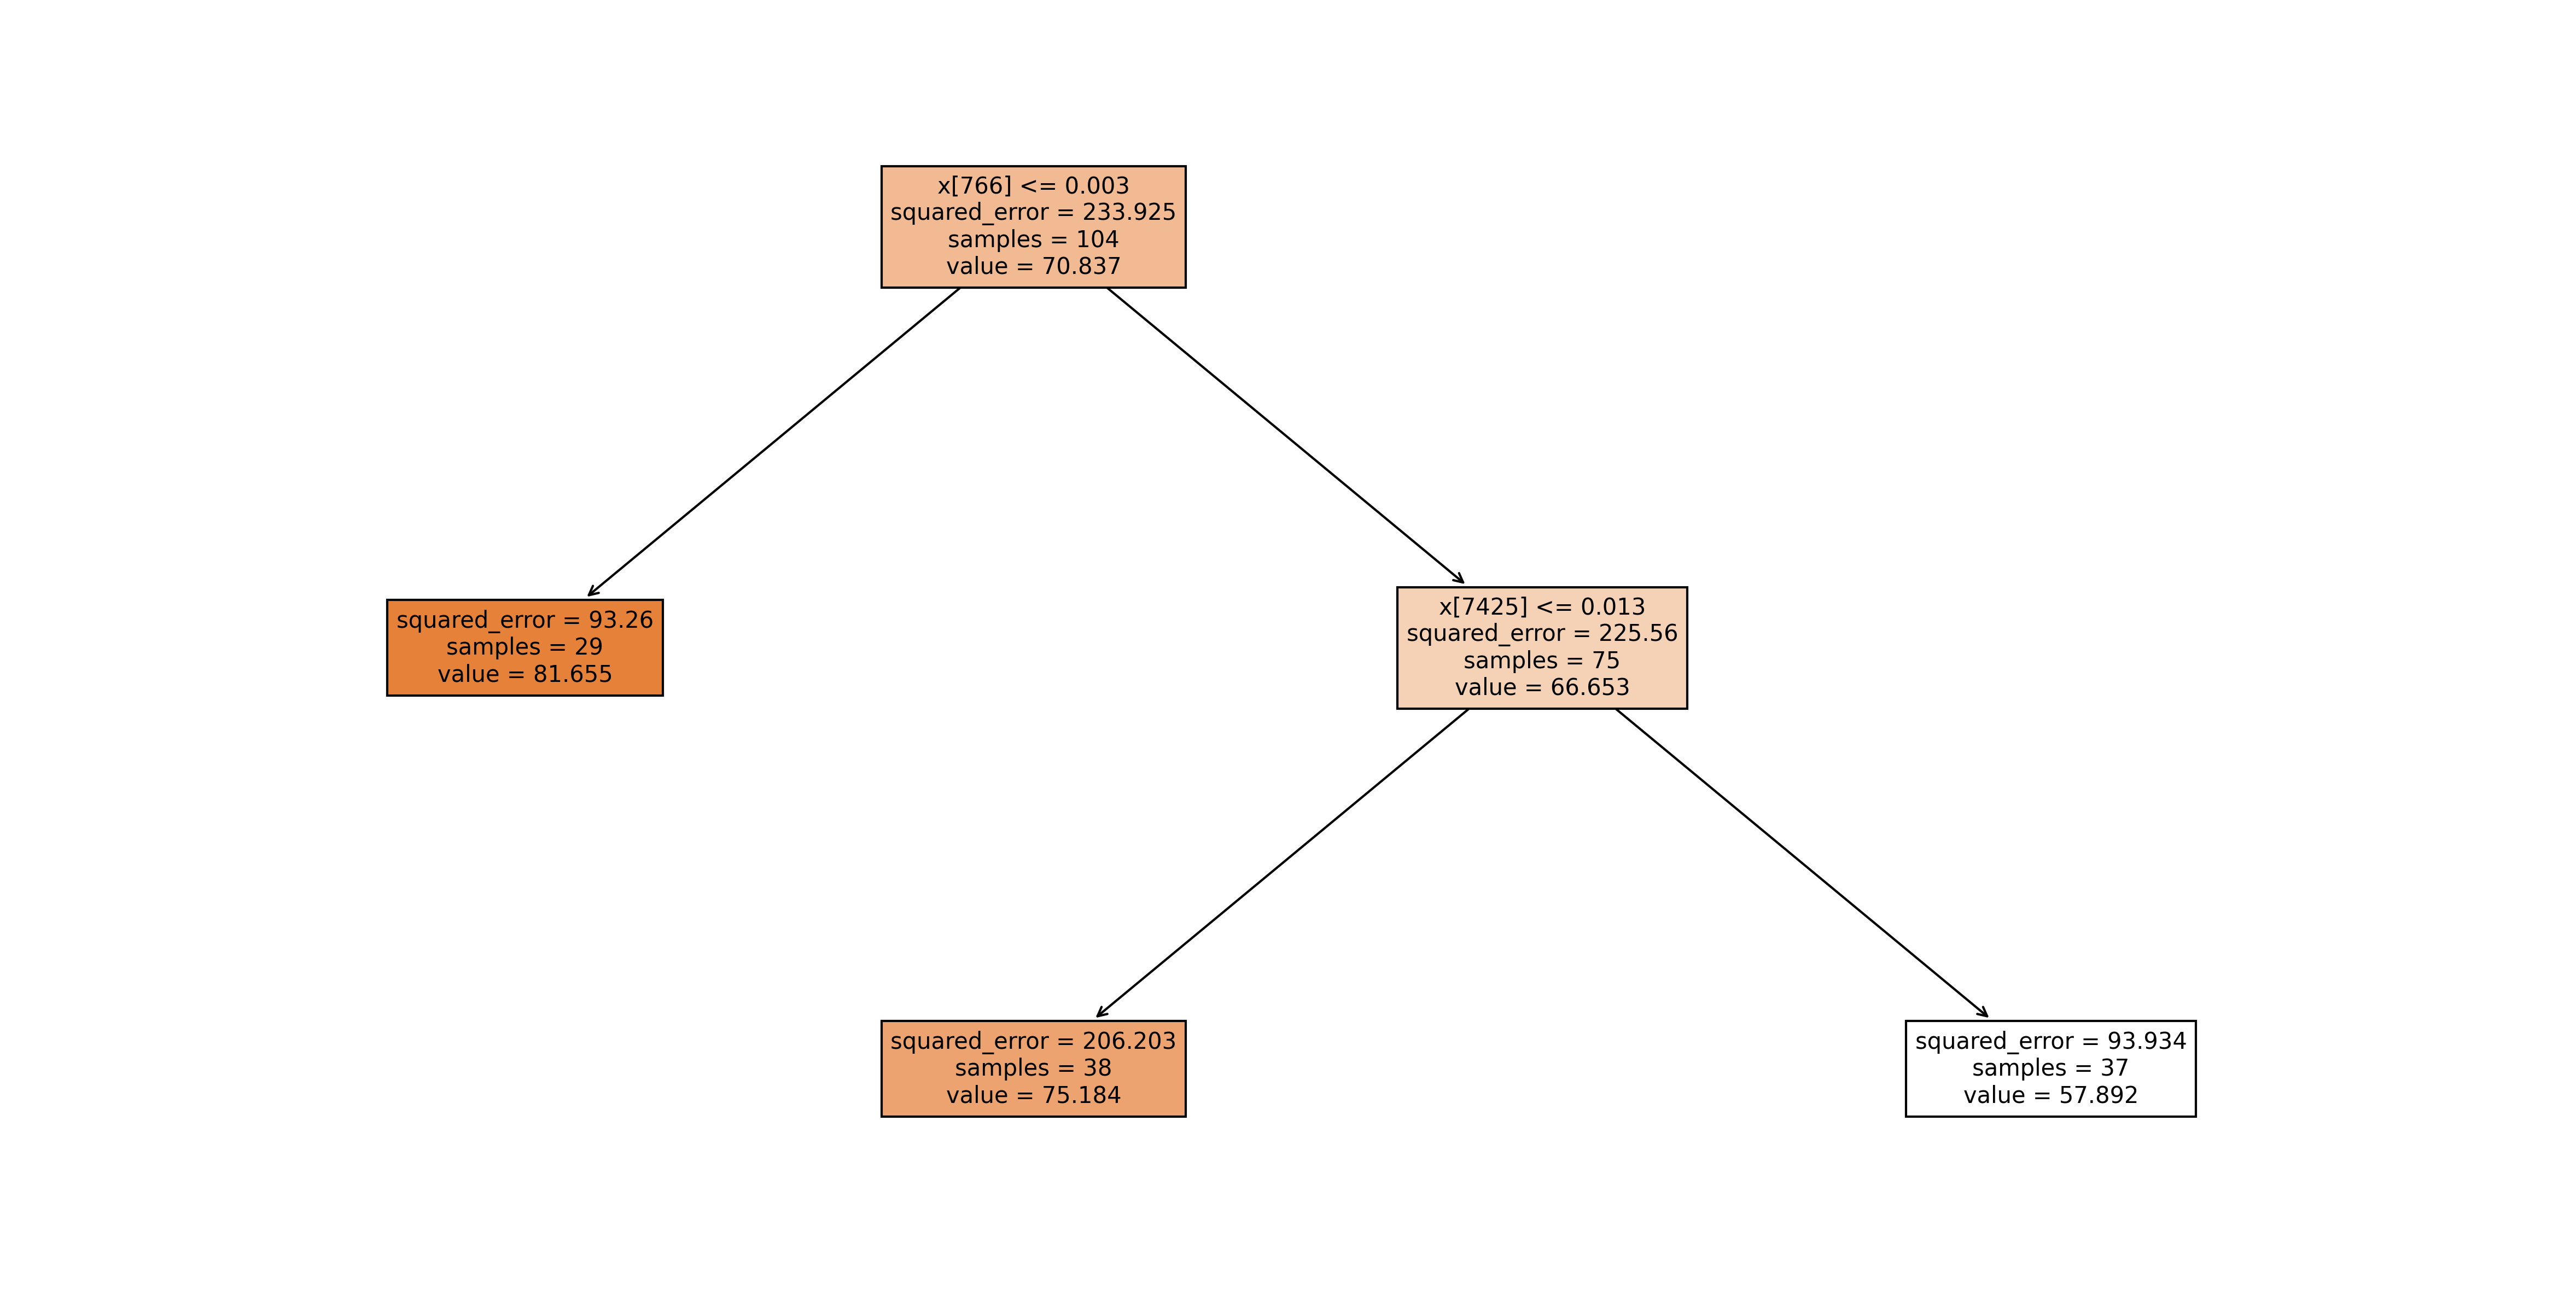

In [30]:
plt.figure(figsize=(20, 10), dpi=300)
plot_tree(model, filled=True, fontsize=10)
plt.show()

# Evalutation

In [31]:
y_pred = model.predict(X_test)
print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
print(f"MSE: {mean_squared_error(y_test, y_pred)}")

MAE: 16.82971331655542
MSE: 424.4423968508682


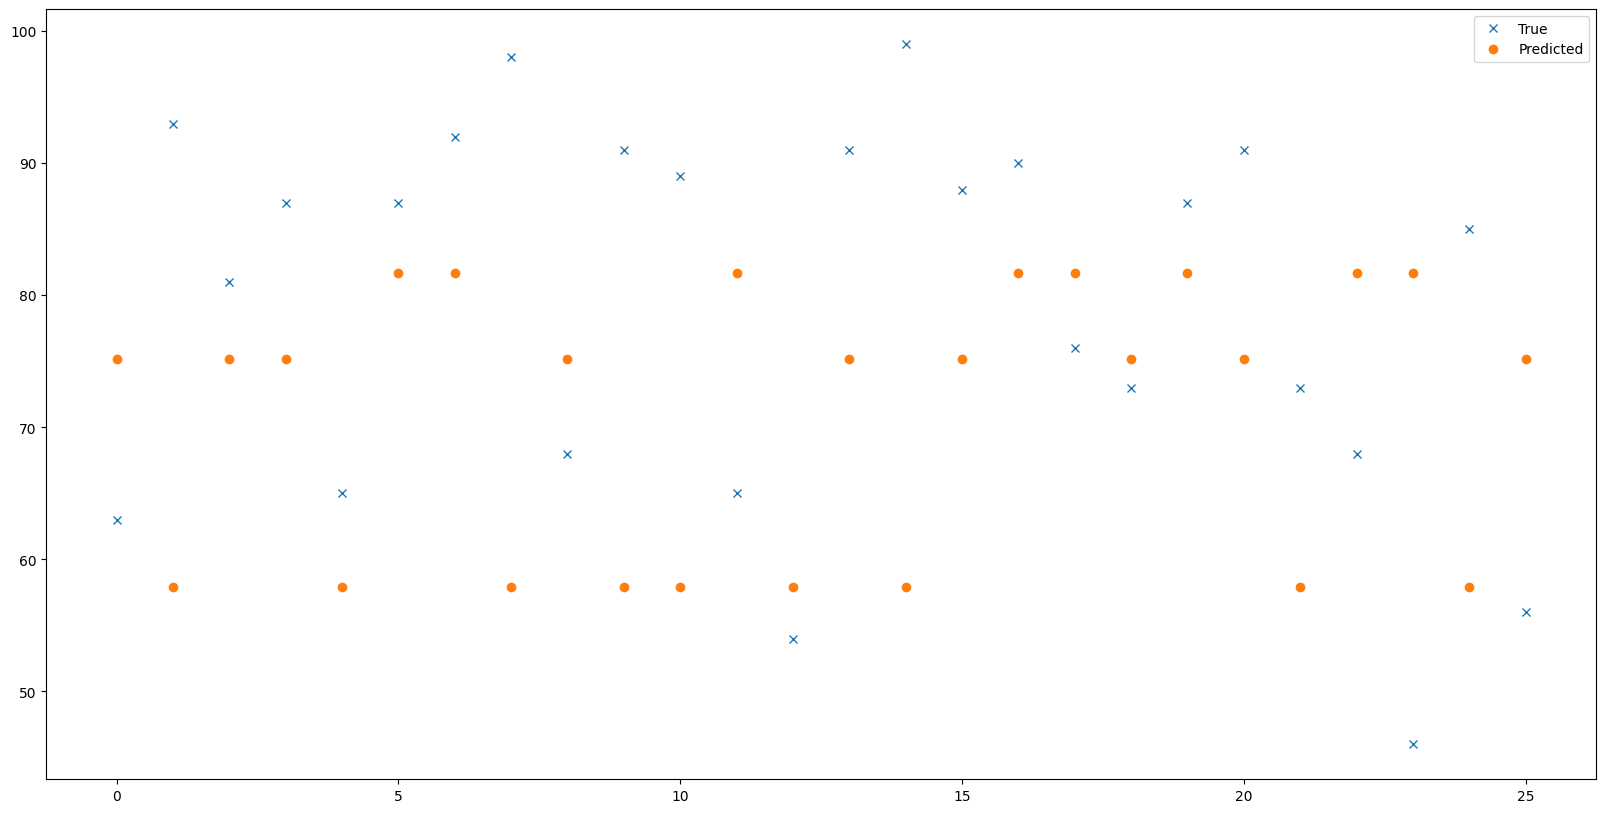

In [32]:
plt.figure(figsize=(20, 10))
plt.plot(y_test, label="True", linestyle='None', marker="x")
plt.plot(y_pred, label="Predicted", linestyle='None', marker="o")
plt.legend()
plt.show()

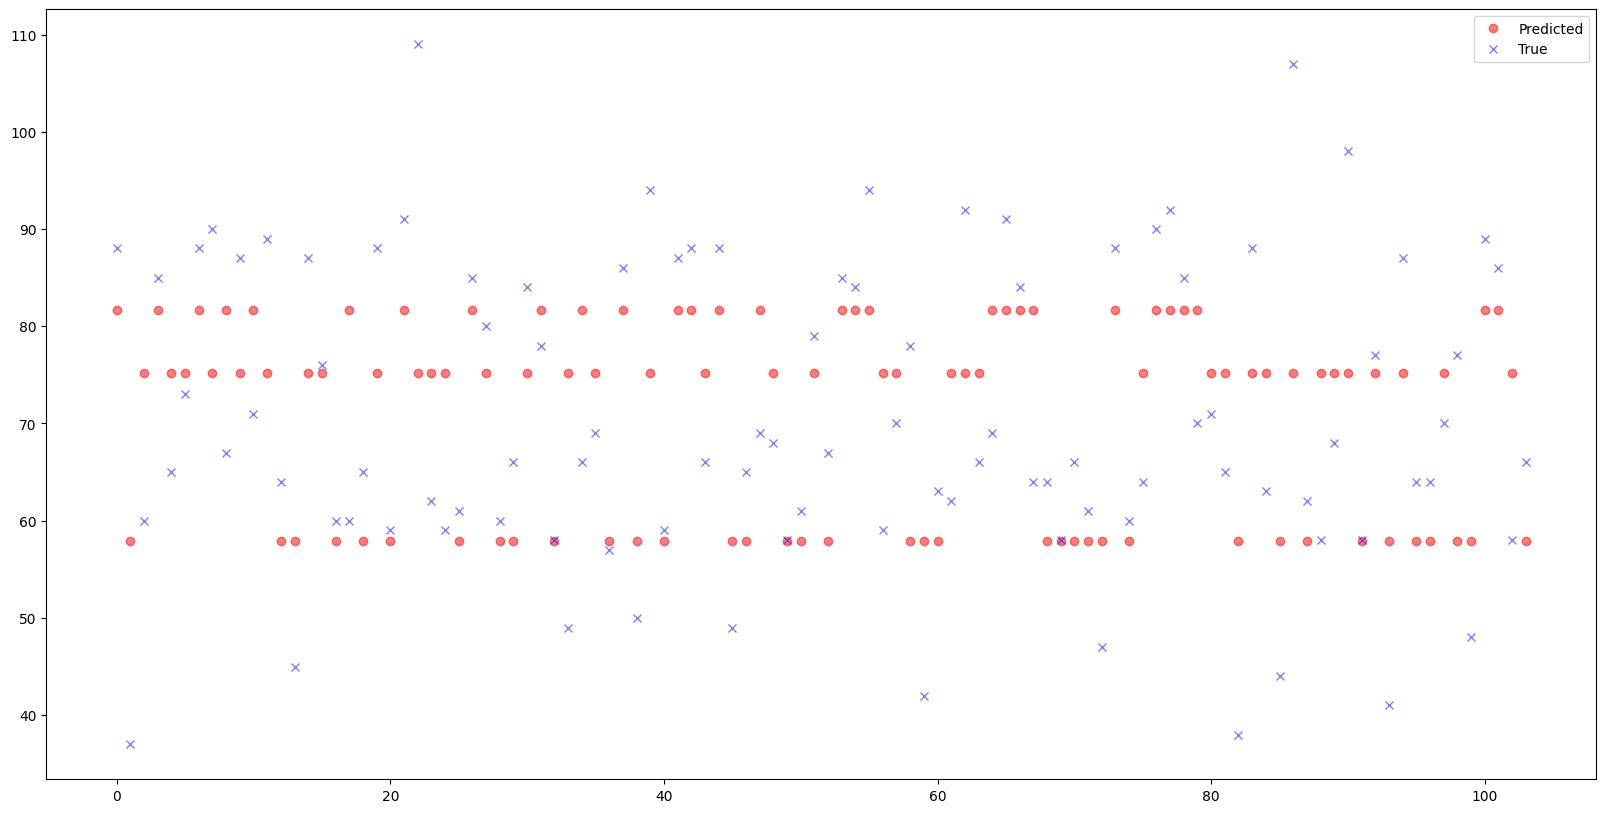

In [33]:
y_pred = model.predict(X_train)

plt.figure(figsize=(20, 10))
plt.plot(y_pred, label="Predicted", linestyle='None', marker="o", alpha=0.5, color="red")
plt.plot(y_train, label="True", linestyle='None', marker="x", alpha=0.5, color="blue")
plt.legend()
plt.show()